<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli. Adapted for CECS APML and PR by Arash Sarshar. Shared under the same licenses.</td>
 <td> </td>
</table>

# Feedforward Neural Networks

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [429]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [430]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [437]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [439]:
batch_size = 40
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(np.ceil(num_epochs))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [458]:
for i,d in enumerate(train_loader):
    x, y = d
    break

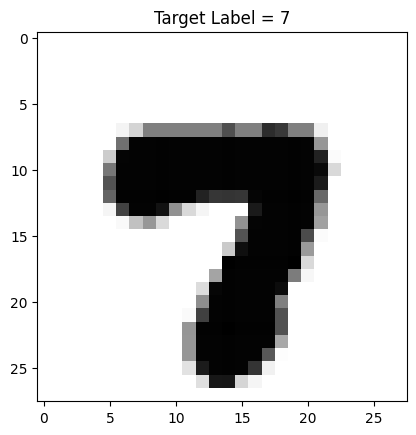

In [462]:
idx = 5
plt.imshow(x[idx,0,:,:], cmap='Greys')
plt.title('Target Label = {}'.format(y[idx].numpy()));

In [463]:
class Perceptron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()

        # Non-linearity
        self.activation = nn.Sigmoid()
        
        self.fc1 = nn.Linear(input_dim, output_dim, ) 
        
    
    def forward(self, x):
        out  = self.activation(self.fc1(x))
        return out

In [291]:
class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNN, self).__init__()

        # Non-linearity
        self.activation = nn.Sigmoid()
        
        # Input Layer 
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        
        # Hidden Layer 
        self.fc2 = nn.Linear(hidden_dim, hidden_dim) 

        # Output Layer 
        self.fc3 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        h1  = self.activation(self.fc1(x))
        h2  = self.activation(self.fc2(h1))
        out = self.activation(self.fc3(h2))
        return out

In [314]:
model = FFNN(28*28, 50, 10)

In [464]:
model = Perceptron(28*28, 10 )

In [465]:
model

Perceptron(
  (activation): Sigmoid()
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)

In [476]:
ex = x[0,0,:,:]
ex= ex.reshape(1,28*28)

In [477]:
model(ex)

tensor([[0.5943, 0.4406, 0.4479, 0.5740, 0.5139, 0.4697, 0.5342, 0.5351, 0.4534,
         0.5294]], grad_fn=<SigmoidBackward0>)

In [328]:
[print(p.shape) for p in model.parameters()]

torch.Size([10, 784])
torch.Size([10])


[None, None]

In [467]:
print("Params:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Params: 7850


In [331]:
loss_function = nn.CrossEntropyLoss()

In [332]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  

In [335]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        prediction = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = loss_function(prediction, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.5499647855758667. Accuracy: 91.58999633789062
Iteration: 1000. Loss: 1.5271341800689697. Accuracy: 91.6500015258789
Iteration: 1500. Loss: 1.4804481267929077. Accuracy: 91.41999816894531
Iteration: 2000. Loss: 1.4886924028396606. Accuracy: 91.87000274658203
Iteration: 2500. Loss: 1.5343859195709229. Accuracy: 91.68000030517578
Iteration: 3000. Loss: 1.5257821083068848. Accuracy: 91.94999694824219


In [354]:
_, predicted = torch.max(outputs.data, 1)
error        = predicted - labels


In [388]:
idx_error = error.nonzero()[1,:].detach().item()
idx_error

15

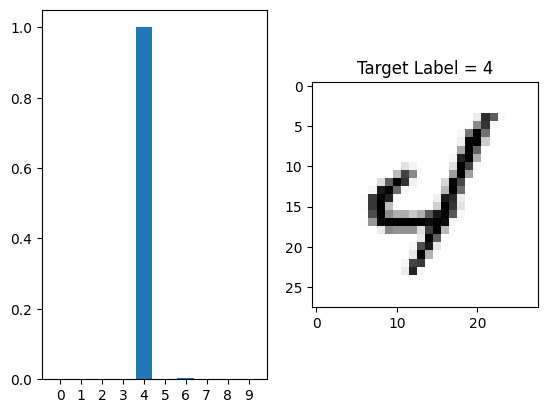

In [391]:
idx = 14
ax = plt.subplot(121)
ax.bar(range(10), outputs[idx,:].detach().numpy())
ax.set_xticks(range(10))
image = images.view(-1, 28,28).detach().numpy()
plt.subplot(122)
plt.imshow(image[idx,:,:], cmap='Greys')
plt.title('Target Label = {}'.format(labels[idx].detach().numpy()));

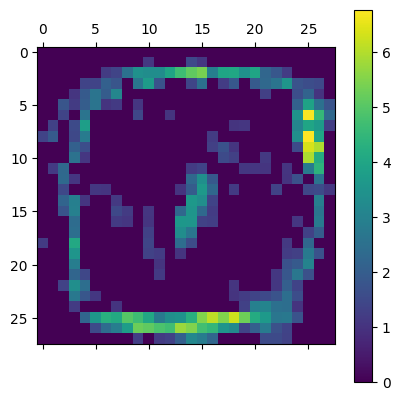

In [384]:
params = list(model.parameters())
W = params[0].detach().numpy()
W = np.abs(W[0,:])
W[W< 1] = 0
W = W.reshape(28,28)
plt.matshow(W)
plt.colorbar()

https://x.com/BenThePearman/status/1707248821225631972?s=20

In [427]:
new_image  = image[idx,:,:]
new_image  = torch.tensor(new_image + 0.3*np.random.rand(*new_image.shape), dtype=torch.float)
new_output = model(new_image.flatten())

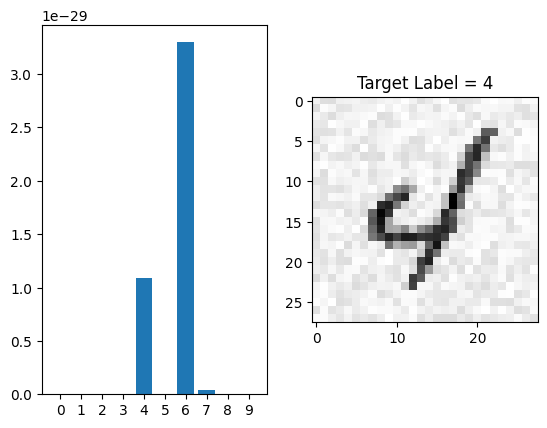

In [428]:
ax = plt.subplot(121)
ax.bar(range(10),new_output.detach().numpy())
ax.set_xticks(range(10))
new_image = new_image.reshape(28,28).detach().numpy()
plt.subplot(122)
plt.imshow(new_image, cmap='Greys')
plt.title('Target Label = {}'.format(labels[idx].detach().numpy()));